<a href="https://colab.research.google.com/github/ShreyJais/Speech-Processing/blob/main/2348558_SPR_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

<div style="font-size: 24px; color:#563e5e; font-weight: bold; background-color: #fff; padding: 8px; margin-bottom: 10px;">
    (a) Plot both vectors to visualize their patterns
</div>

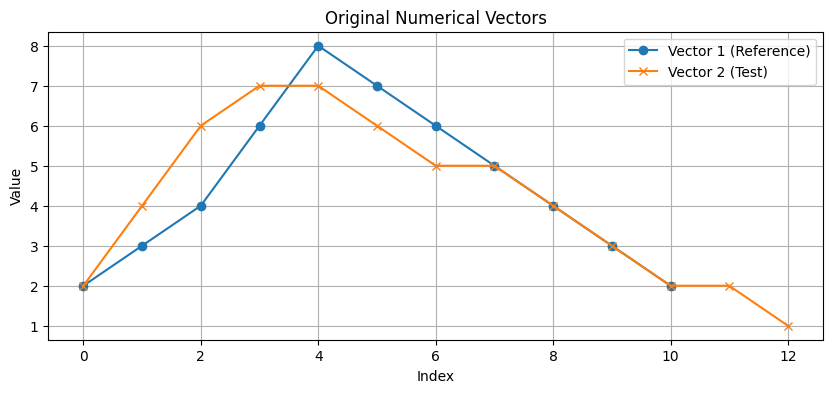

In [ ]:
# Vectors
vector_1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])  # Reference vector
vector_2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])  # Test vector

# (a) Plot both vectors
plt.figure(figsize=(10, 4))
plt.plot(vector_1, label="Vector 1 (Reference)", marker='o')
plt.plot(vector_2, label="Vector 2 (Test)", marker='x')
plt.title("Original Numerical Vectors")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

<div style="font-size: 16px; color:#563e5e; font-weight: bold; background-color: #fff; padding: 8px; margin-bottom: 10px;"><i>
    This code plots the original sequences to visualize their patterns. The difference in lengths between the vectors is evident: Vector 1 is shorter, while Vector 2 is stretched and slightly shifted</i>
</div>

---

<div style="font-size: 24px; color:#563e5e; font-weight: bold; background-color: #fff; padding: 8px; margin-bottom: 10px;">
    (b) Implement Dynamic Time Warping (DTW) algorithm
</div>

In [ ]:
# (b) Implement DTW algorithm

distance_matrix = cdist(vector_1[:, None], vector_2[:, None], metric='euclidean')

n, m = distance_matrix.shape
cost_matrix = np.zeros((n, m))
cost_matrix[0, 0] = distance_matrix[0, 0]

for i in range(1, n):
    cost_matrix[i, 0] = cost_matrix[i - 1, 0] + distance_matrix[i, 0]
for j in range(1, m):
    cost_matrix[0, j] = cost_matrix[0, j - 1] + distance_matrix[0, j]
for i in range(1, n):
    for j in range(1, m):
        cost_matrix[i, j] = distance_matrix[i, j] + min(
            cost_matrix[i - 1, j],
            cost_matrix[i, j - 1],
            cost_matrix[i - 1, j - 1])

<div style="font-size: 16px; color:#563e5e; font-weight: bold; background-color: #fff; padding: 8px; margin-bottom: 10px;">
    <i>This code implements the DTW algorithm. It calculates a distance matrix between the vectors using the Euclidean metric and constructs an accumulated cost matrix by iteratively adding the minimum cost of three operations: insertion, deletion, and match.

</i>
</div>

---

<div style="font-size: 24px; color:#563e5e; font-weight: bold; background-color: #fff; padding: 8px; margin-bottom: 10px;">
   (c) Compute the accumulated cost matrix
</div>

In [ ]:
# (c) Accumulated cost matrix
accumulated_cost_matrix = cost_matrix.copy()

<div style="font-size: 16px; color:#563e5e; font-weight: bold; background-color: #fff; padding: 8px; margin-bottom: 10px;">
    <i>The accumulated cost matrix is computed and stored. It represents the cumulative cost of aligning portions of the two vectors up to each point.</i>
</div>

---

<div style="font-size: 24px; color:#563e5e; font-weight: bold; background-color: #fff; padding: 8px; margin-bottom: 10px;">
   (d) Find and visualize the warping path
</div>

In [ ]:
# (d) Find the warping path
i, j = n - 1, m - 1
warping_path = [(i, j)]
while i > 0 or j > 0:
    if i == 0:
        j -= 1
    elif j == 0:
        i -= 1
    else:
        direction = np.argmin([
            cost_matrix[i - 1, j],
            cost_matrix[i, j - 1],
            cost_matrix[i - 1, j - 1]
        ])
        if direction == 0:
            i -= 1
        elif direction == 1:
            j -= 1
        else:
            i -= 1
            j -= 1
    warping_path.append((i, j))

warping_path = warping_path[::-1]

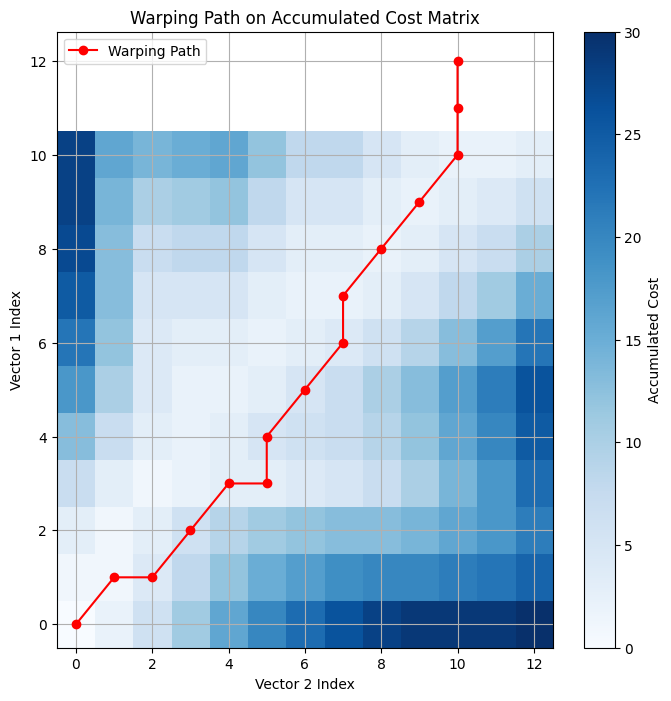

In [ ]:
# Visualize the warping path
plt.figure(figsize=(8, 8))
plt.imshow(accumulated_cost_matrix, origin='lower', cmap='Blues', aspect='auto')
plt.colorbar(label="Accumulated Cost")
plt.plot(*zip(*warping_path), marker='o', color='red', label="Warping Path")
plt.title("Warping Path on Accumulated Cost Matrix")
plt.xlabel("Vector 2 Index")
plt.ylabel("Vector 1 Index")
plt.legend()
plt.grid()
plt.show()

<div style="font-size: 16px; color:#563e5e; font-weight: bold; background-color: #fff; padding: 8px; margin-bottom: 10px;">
   <i>This code traces the optimal warping path through the accumulated cost matrix, starting from the bottom-right corner and moving to the top-left. It visualizes the path overlaid on the accumulated cost matrix.
</i>
</div>

---

<div style="font-size: 24px; color:#563e5e; font-weight: bold; background-color: #fff; padding: 8px; margin-bottom: 10px;">
    (e) Calculate the DTW distance
</div>

In [ ]:
# (e) Calculate DTW distance
dtw_distance = cost_matrix[-1, -1]
print(dtw_distance)

3.0


<div style="font-size: 16px; color:#563e5e; font-weight: bold; background-color: #fff; padding: 8px; margin-bottom: 10px;">
  <i> The DTW distance is the value in the bottom-right corner of the accumulated cost matrix. It represents the minimal cumulative cost of aligning the two vectors. The DTW distance is 3, indicating the total cost of alignment.

</i>
</div>

---

<div style="font-size: 24px; color:#563e5e; font-weight: bold; background-color: #fff; padding: 8px; margin-bottom: 10px;">
    Aligned Vectors
</div>

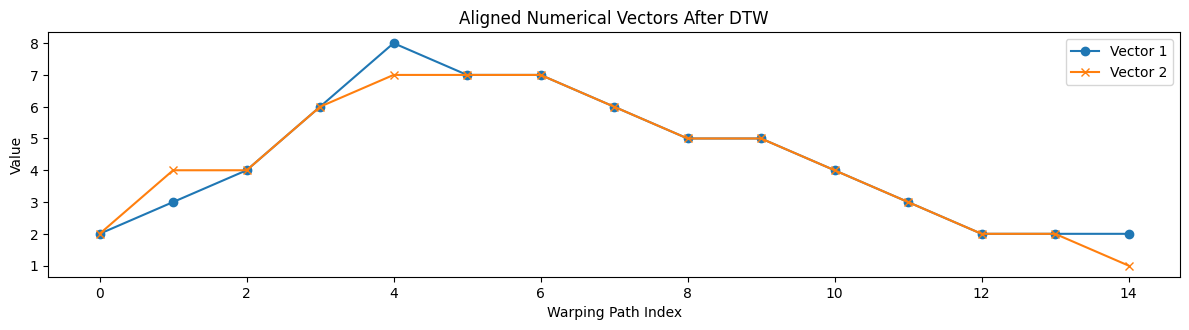

In [ ]:
aligned_vector_1 = [vector_1[i] for i, j in warping_path]
aligned_vector_2 = [vector_2[j] for i, j in warping_path]
plt.figure(figsize=(12, 6))

# Aligned signals
plt.subplot(2, 1, 2)
plt.plot(aligned_vector_1, label="Vector 1", marker='o')
plt.plot(aligned_vector_2, label="Vector 2", marker='x')
plt.title("Aligned Numerical Vectors After DTW")
plt.xlabel("Warping Path Index")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()


<div style="font-size: 16px; color:#563e5e; font-weight: bold; background-color: #fff; padding: 8px; margin-bottom: 10px;">
  <i> The aligned vectors are plotted to demonstrate how DTW adjusts Vector 2 to match Vector 1. As we can see that DTW has succesfully re-aligned signal 2 to match signal 1
</i>
</div>

---



<div style="font-size: 24px; color:#563e5e; font-weight: bold; background-color: #fff; padding: 8px; margin-bottom: 10px;">
   (f) Inference
</div>

<div style="font-size: 16px; color:#563e5e; font-weight: bold; background-color: #fff; padding: 8px; margin-bottom: 10px;">
  Dynamic Time Warping (DTW) effectively aligns Vector 2 with Vector 1, despite differences in length and slight shifts in amplitude. The warping path shows how each element in Vector 1 corresponds to an element in Vector 2, even with stretching or compression in the sequences.
  <ol>
  <li> <i>Alignment</i>: DTW accounts for local stretching and compression, ensuring a precise alignment. </li>
  <li> <i>Similarity</i>: The DTW distance of 3 indicates a low dissimilarity between the two vectors, confirming that Vector 2 is a stretched and slightly shifted version of Vector 1. </li>
</ol>
</div>



---

